# A 
Загрузите и распакуйте матрицы эмбеддингов GloVe

In [52]:
#Загружаем текст
import os
import scipy as sp
import time
import math
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

with open(f'glove/glove.6B.100d.txt', 'r') as f:
    text = f.read()
glove=[word_glove for word_glove in text.split('\n')]
glove=[[word_glove for word_glove in i.split(' ')] for i in glove]
glove=glove[:-1]

embedding=[i[1:] for i in glove]
word_embedding=[i[0] for i in glove]
word_dict=defaultdict(int)

for i in range(len(word_embedding)):##Сделаем словарь для скорости
    word_dict[word_embedding[i]]=i
word_embedding=word_dict

embedding=np.array(embedding,dtype=float)


In [53]:
with open(f'filimdb_evaluation/FILIMDB/train.labels', 'r') as f:
    text_labels = f.read()
labels_train = [1 if label=="pos" else 0  for label in text_labels.split('\n')]
Y_train = [[1,0] if i==1 else [0,1]  for i in labels_train]

In [54]:
with open(f'filimdb_evaluation/FILIMDB/dev.labels', 'r') as f:
    text_labels = f.read()
labels_dev = [1 if label=="pos" else 0  for label in text_labels.split('\n')]
Y_dev = [[1,0] if i==1 else [0,1]  for i in labels_dev]

#### ВопросA.2:
Для 10 выбранных вами слов найдите 25 ближайших слов. Сравните результаты при использовании в качестве меры близости скалярного произведения и косинуса угла между векторами. Приведите сами слова, отсортированные по убыванию меры близо-сти, и значения меры близости.

In [168]:
A_embedding=embedding[350:360]
A_word=word_embedding[350:360]

A_embedding=A_embedding.dot(embedding.T)
n,m=A_embedding.shape
print("Используем  скалярное произведение!!!")
for i in range(n):
    B=abs(A_embedding[i])
    B=np.sort(B)
    
    
    print(A_word[i],":\t word\t\t embedding\n")
    for k in range(25):
        
        j, = np.where(A_embedding[i] == B[k])
        if not j.shape==(0,):
            j=int(j)
            print("\t",word_embedding[j]," - ",B[k])
    print("\n\n")
        

Используем  скалярное произведение!!!
earlier :	 word		 embedding

	 680,000  -  0.0001256527327998624
	 noda  -  0.00012781439379953448
	 118.90  -  0.00021260554019996613
	 vaali  -  0.00022519944800019975
	 yalta  -  0.000249406935999609
	 romer  -  0.00034925183320016324
	 showalter  -  0.00041542268100043457
	 coxed  -  0.00043911699399998874
	 1050  -  0.00044165495099992907
	 berdymukhamedov  -  0.0004606305054995848
	 mayorsjwl  -  0.0004798317859005466
	 kabbaj  -  0.0007275629153995663
	 foo  -  0.0007768807469999937
	 passerby  -  0.0009243658150000708
	 oppositely  -  0.000999162396000041



capital :	 word		 embedding

	 minle  -  0.00019832815540015867
	 zhaozong  -  0.0002332481409997677
	 bluechips  -  0.0002483567043998717
	 cootamundra  -  0.00041549527520038634
	 hargett  -  0.0004272412980001782
	 popów  -  0.0004499067639001526
	 pocahontas  -  0.0005035340181401254
	 habibur  -  0.0005139768300001733
	 cges  -  0.0005273527101996941
	 banaue  -  0.0005898780094012

In [173]:
A_embedding=embedding[350:360]
A_word=word_embedding[350:360]

A_embedding=A_embedding/(np.linalg.norm(A_embedding,axis=1).reshape(10,1))
B=embedding/(np.linalg.norm(embedding,axis=1).reshape(400000,1))

A_embedding=A_embedding.dot(embedding.T)
n,m=A_embedding.shape
print("Используем  косинус угла между векторами!!!")
for i in range(n):
    B=abs(A_embedding[i])
    B=np.sort(B)
    
    
    print(A_word[i],":\t word\t\t embedding\n")
    for k in range(25):
        
        j, = np.where(A_embedding[i] == B[k])
        if not j.shape==(0,):
            j=int(j)
            print("\t",word_embedding[j]," - ",B[k])
    print("\n\n")
        

Используем  косинус угла между векторами!!!
earlier :	 word		 embedding

	 680,000  -  2.5655611678250013e-05
	 noda  -  2.6096976811738706e-05
	 118.90  -  4.34095228849744e-05
	 vaali  -  4.5980930611754185e-05
	 yalta  -  5.092358405035474e-05
	 romer  -  7.130978539716033e-05
	 showalter  -  8.48204631018781e-05
	 coxed  -  8.96583371359907e-05
	 1050  -  9.017653389760072e-05
	 berdymukhamedov  -  9.405093795365606e-05
	 mayorsjwl  -  9.797143043103668e-05
	 kabbaj  -  0.0001485528504882196
	 foo  -  0.0001586225012482757
	 passerby  -  0.0001887358107533872
	 oppositely  -  0.0002040076794525541



capital :	 word		 embedding

	 minle  -  3.438655426576126e-05
	 zhaozong  -  4.044105508718641e-05
	 bluechips  -  4.306060970445141e-05
	 cootamundra  -  7.203944794954728e-05
	 hargett  -  7.407599817924117e-05
	 popów  -  7.800578450502764e-05
	 pocahontas  -  8.730379105555818e-05
	 habibur  -  8.911438782119736e-05
	 cges  -  9.143352616759351e-05
	 banaue  -  0.00010227429453717

Если приглядеться, то результаты не поменялись.Может неверно, посчитал.=()

#### Вопрос A.3:
Найдите 25 пар максимально близких друг к другу слов:

In [177]:
word_embedding[:1000]

['the',
 ',',
 '.',
 'of',
 'to',
 'and',
 'in',
 'a',
 '"',
 "'s",
 'for',
 '-',
 'that',
 'on',
 'is',
 'was',
 'said',
 'with',
 'he',
 'as',
 'it',
 'by',
 'at',
 '(',
 ')',
 'from',
 'his',
 "''",
 '``',
 'an',
 'be',
 'has',
 'are',
 'have',
 'but',
 'were',
 'not',
 'this',
 'who',
 'they',
 'had',
 'i',
 'which',
 'will',
 'their',
 ':',
 'or',
 'its',
 'one',
 'after',
 'new',
 'been',
 'also',
 'we',
 'would',
 'two',
 'more',
 "'",
 'first',
 'about',
 'up',
 'when',
 'year',
 'there',
 'all',
 '--',
 'out',
 'she',
 'other',
 'people',
 "n't",
 'her',
 'percent',
 'than',
 'over',
 'into',
 'last',
 'some',
 'government',
 'time',
 '$',
 'you',
 'years',
 'if',
 'no',
 'world',
 'can',
 'three',
 'do',
 ';',
 'president',
 'only',
 'state',
 'million',
 'could',
 'us',
 'most',
 '_',
 'against',
 'u.s.',
 'so',
 'them',
 'what',
 'him',
 'united',
 'during',
 'before',
 'may',
 'since',
 'many',
 'while',
 'where',
 'states',
 'because',
 'now',
 'city',
 'made',
 'like',
 

# B
Напишите функцию предобработки и токенизации отзывов. 

In [4]:
def preprocessing(my_text):
    #Переводим в нижний регистр
    #else ' '+symbol if symbol=="'" else
    return ''.join([symbol.lower() if symbol.isalnum() or symbol==' '  else ' '+symbol+' ' for symbol in my_text])

In [5]:
def tokenization(my_text):
    return [word for word in my_text.split(' ') if not word==' 'and not word=='  ' and not word==''and not word=='   ']

# C 
Напишите функцию векторизации отзыва. 
Для этого для каждого токена из отзывавам нужно найти его GloVe эмбеддинг, 
и в качестве векторного представления отзыва
выдавать среднее арифмитическое от GloVe эмбеддингов всех токенов из отзыва.

In [6]:
def vectorize_review(review,glove_word,glove_embedding):
#     ,new_word
    N=len(review)
    n,m=glove_embedding.shape
    mean=np.zeros((1,m))
    for i in review:
        
        if i in glove_word:
            k=glove_word[i]
        else:
#             new_word.append(i)#############################################################
            k=5 ##ЧТО ДЕЛАТЬ ЕСЛИ СЛОВО ТО НАМ НЕИЗВЕСТНО??? КАК ВЕКТОР 'unk' задать???????
        mean += glove_embedding[k]
    mean /=N
    return mean
        

# D 
Преобразуйте обучающую и тестовую выборки в матрицы размера N∗d, 
где N– количе-ство отзывов в выборке, а d– выбранный вами размер эмбеддингов GloVe(50, 100 или 300). 

In [55]:
#Скачиваем тестовую выборку!! #######################
with open(f'filimdb_evaluation/FILIMDB/train.texts', 'r') as f:
    text = f.read()
train=[review for review in text.split('\n')]
train=train[:-1]

In [56]:
train=np.array([vectorize_review(tokenization(preprocessing(review)),word_embedding,embedding) for review in train])
a,b,c=train.shape
train=train.reshape((a,c))

In [57]:
#Скачиваем валидационую выборку     #######################################################################
with open(f'filimdb_evaluation/FILIMDB/dev.texts', 'r') as f:
    text = f.read()
develop=[review for review in text.split('\n')]
develop=develop[:-1]

In [58]:
develop=np.array([vectorize_review(tokenization(preprocessing(review)),word_embedding,embedding) for review in develop])
a,b,c=develop.shape
develop=develop.reshape((a,c))

# Вопрос D:
Для скольких токенов и какого количество уникальных слов из обучающей и тестовой выборки 
вы не нашли GloVe эмбеддинги? Приведите 20 примеров таких слов.

In [ ]:
new_word=[]
train=np.array([vectorize_review(tokenization(preprocessing(review)),word_embedding,embedding,new_word) for review in train])

In [52]:
new_word[:20]

['\x85',
 'enging',
 'moviestore',
 '20mn',
 'grandeurs',
 'anachronic',
 'decaune',
 'kitchy',
 'kojac',
 'lashelle',
 'payaso',
 'plinplin',
 'blainsworth',
 'blains',
 'crackd',
 '1984ish',
 'lonnrot',
 'yidische',
 'zaitung',
 'discplines']

# E
Опираясь на формулы из теоретической части задания, реализуйте прямой проход для 
нейронной сети с L-скрытыми слоями. Размер скрытых слоев вы можете выбрать произвольно.

 ### Для реализации прямого прохода, вам потребуется имплементировать следующие функции:
relu(z),tanh(z),sigmoid(z)- функции активации

In [15]:
def sigmoida (arg):
    arg=np.array(arg)
    shp=arg.shape
    arg=np.ravel(arg)
    return  1/(1+np.exp(-arg)) if shp==() else np.array([ math.fabs(1/(1+np.exp(-i))-1e-7) if 1/(1+np.exp(-i))==0.0 or 1/(1+np.exp(-i))==1.0 else 1/(1+np.exp(-i)) for i in arg] ).reshape(shp)
# math.fabs(1/(1+np.exp(-i))-1e-7) if 1/(1+np.exp(-i))==0.0 or 1/(1+np.exp(-i))==1.0 else 1/(1+np.exp(-i))
#Делаю проверку на те случаи, когда сигмоида выдаёт либо 0, либо 1.В таком случае чуть отступаю в сторонку=)
def logs (arg):
    arg=np.array(arg)
    shp=arg.shape
    arg=np.ravel(arg)
    return  math.log(arg) if shp==() else np.array([math.log(i) for i in arg]).reshape(shp)

def tanh(arg):
    arg=np.array(arg)
    shp=arg.shape
    arg=np.ravel(arg)
    arg=np.exp(arg*2)
    arg=(arg-1)/(arg+1)
    return arg.reshape(shp)

def relu(arg):
    arg=np.array(arg)
    shp=arg.shape
    arg=np.ravel(arg)
    return np.array([0 if i<=0 else i for i in arg]).reshape(shp)

def relu_D(arg):
    arg=np.array(arg)
    shp=arg.shape
    arg=np.ravel(arg)
    return np.array([0 if i<=0 else 1 for i in arg]).reshape(shp)

def tanh_D(arg):
    arg=np.array(arg)
    shp=arg.shape
    arg=np.ravel(arg)
    arg=np.exp(arg*2)
    arg=(arg*4)/((arg+1)**2)
    return arg.reshape(shp)
    
def sigmoida_D (arg):
    arg=np.array(arg)
    shp=arg.shape
    arg=np.ravel(arg)
    arg = sigmoida(arg)
    return (arg*(1-arg)).reshape(shp)

###### init_params(layer_sizes,activation) 
принимает список размеров слоев сети и строку с именем функции активации (sigmoid/relu/tanh/linear); возвращает начальные значения весов в виде словаря с ключами - именами весов и значениями - соответствующими матрицами

In [16]:
def init_params(layer_sizes,activation):
    dict={}
    for l in np.arange(1,len(layer_sizes)):
        name=[]
        if activation=='tanh' or activation=='sigmoid':
            w=np.random.randn(layer_sizes[l],1+layer_sizes[l-1])*np.sqrt(1/layer_sizes[l])
        if activation=='relu' or activation=='linear':
            w=np.random.randn(layer_sizes[l],1+layer_sizes[l-1])*np.sqrt(2/(layer_sizes[l-1]+layer_sizes[l]))
        name.append('w')
        name.append(str(l))
        name=' '.join(name)
        dict[name]=w
    return dict

###### fully_connected(a_prev,W,activation)
принимает выход предыдущего слоя, веса текущего слоя, строку с именем функции активации (sigmoid/relu/tanh/linear); возвращает выход текущего слоя и кэш промежуточных значений, которые потребуются на обратном проходе

In [17]:
def fully_connected(a_prev,W,activation):
    n,_=a_prev.shape
    X0= np.ones((n,1))
    a_prev = np.hstack((X0,a_prev))
    Z = a_prev.dot(W.T) ## проверил формулу, верна!
    
    if activation=='tanh':
        A = tanh(Z)
    if activation=='sigmoid':
        A = sigmoida(Z )
    if activation=='relu':
        A = relu(Z )
    return A,Z

##### ffnn(X,params,activation)
принимает батч примеров, веса сети и строку с именем функции активации; возращает Z(L)- предактивации последнего слоя и список кэшей,полученных из функции fully_connected;

In [101]:
def ffnn(X,params,activation):
    A=[]
    Z=[]
    A.append(X)
    Z.append(0)
    for i in range(len(params)):
        name=[]
        name.append('w')
        name.append(str(i+1))
        name=' '.join(name)
        a,z=fully_connected(A[i],params[name],activation)
        A.append(a)
        Z.append(z)
    return a,A,Z

##### softmax_crossentropy(ZL,Y)
принимает предактивации последнего слоя и матрицу one-hot векторов классов, возвращает значение оценочной функции и кэш. Если ZL содержит большие положительные компоненты, после их экспоненцирования может возникнуть переполнение. Чтобы этого избежать, вычтите из каждой строки максимальное значение в этой строке, воспользовавшись свойством softmax, доказанным в теоретической части.

In [19]:
def  softmax_crossentropy(ZL,Y,W,a):
    ##Пользуемся свойством softmax
    Y = np.array(Y)
    n,m =ZL.shape
    ZL = softmax(ZL)
    accuracy = 0
    for i in range(n):
        if np.argmax(ZL[i]) == np.argmax(Y[i]):
            accuracy += 1
    
#     Y = np.argmax(Y,axis=1)
    
#     crossentropy = np.array([ logs(ZL[i][Y[i]]) for i in range(n)])
#     crossentropy = -np.sum(crossentropy)/n
    crossentropy = 0
    for i in range(len(W)):
        
        name = []
        name.append('w')
        name.append(str(i+1))
        name =' '.join(name)
        dev = W[name]
        crossentropy += np.trace(dev.dot(dev.T))
    
    ZL = logs(ZL)
    crossentropy *= a
    crossentropy -= np.trace(Y.dot(ZL.T))/n
    
        
    
    return crossentropy,accuracy/n
    

In [20]:
def softmax(ZL):
    n,m =ZL.shape
    ZL = ZL-np.max(ZL,axis=1,keepdims=True)##Пользуемся свойством softmax
    ZL = np.exp(ZL)
    ZL = ZL/np.sum(ZL,axis=1,keepdims=True) ##Получили ^Y
    return ZL

## Вопрос E.2:
Сразу после случайной инициализации чему в среднем равенˆy(x)? Чему в среднем равно значение оценочной функции? Вычислите значение оценочной функции на обучающей выборке, чему оно равно?

In [103]:
cro = 0
yy = 0
num=100
acc=0
for i in range(num):
    layer_sizes =[100,10,2]
    activation = 'tanh'
    L_2=1e-2
    params=init_params(layer_sizes,activation)
    X = train[:100]
    a,A,Z=ffnn(X,params,activation)
    u,o = softmax_crossentropy(a,Y_train[:100],params,L_2) 
    acc += o
    cro += u
    yy +=softmax(a).mean()
print("среднее значение оценочной функции:",cro/num,"|| средне значениеˆy(x):",yy/num,sep=" ")
print("ТОЧНОСТЬ: ",acc/num)

среднее значение оценочной функции: 1.9206568823180035 || средне значениеˆy(x): 0.5
ТОЧНОСТЬ:  0.49060000000000037


# F 
Опираясь на формулы из теоретической части задания, реализуйте обратный проход для нейронной сети с L-скрытыми слоями. Для реализации обратного прохода, вам потребуется имплементировать следующие функции:

###### fully_connected_backward(dA,cache,activation)
принимает градиент оценочной функции по выходам текущего слоя, кэш и строку с именем функции активации (sigmoid/relu/tanh/linear);возвращает градиент по выходам предыдущего слоя и градиент по матрице весов текущего слоя

In [106]:
def fully_connected_backward(DZ_l,cache,activation,l2):
    A_l_1 = cache[0]
    W_l = cache[1]
    Z_l_1 = cache[2]
#     A_l_1=A[l-1]
#     DZ_l=DZ[l]
#     W_l=W[l]
#     Z_l_1=Z[l-1]
    DZ_l_1 = 1

    dev = DZ_l
    n,_ = A_l_1.shape
    X0= np.ones((n,1))
    A_l_1 = np.hstack((X0,A_l_1))
    DW_l = 1/n*(DZ_l.T.dot(A_l_1)) +2*l2*W_l
    
    
    if activation=='relu' and not type(Z_l_1) ==int :
        W_l = np.array([i[1:] for i in W_l])
        a = W_l.T.dot(dev.T)
        b = relu_D(Z_l_1)
        b = b.T
        DZ_l_1 = a*b
        DZ_l_1 = DZ_l_1.T  
        
    if activation=='tanh' and not type(Z_l_1) ==int:
        W_l = np.array([i[1:] for i in W_l])
        a = W_l.T.dot(dev.T)
        b = tanh_D(Z_l_1)
        b = b.T
        DZ_l_1 = a*b
        DZ_l_1 = DZ_l_1.T 
        
    if activation=='sigmoida' and not type(Z_l_1) ==int:
        W_l = np.array([i[1:] for i in W_l])
        a = W_l.T.dot(dev.T)
        b = sigmoida_D(Z_l_1)
        b = b.T
        DZ_l_1 = a*b
        DZ_l_1 = DZ_l_1.T   
        
        if  type(Z_l_1) ==int:
            DZ_l_1 = 1

        
    return DZ_l_1,DW_l,
    

###### ffnn_backward(dZ_L,caches,activation)
принимает градиент по предактивациям последнего слоя, список кэшей и строку с именем функции активации; возращает словарь с ключами - именами параметров сети и значениями - градиентами по этим параметрам

In [22]:
def ffnn_backward(DZ_L,caches,activation,a):
    A = caches[0]
    Z = caches[1]
    W = caches[2]
    l = caches[3]
    
    
    dict_DW={}
    
    for i in np.arange(1,l+1)[::-1]:
    
        name = []
        name.append('dw')
        name.append(str(i))
        name =' '.join(name)
        
        name2 = []
        name2.append('w')
        name2.append(str(i))
        name2 =' '.join(name2)
        
        DZ_l_1,DW_l = fully_connected_backward(DZ_L,[A[i-1],W[name2],Z[i-1]],activation,a)
        dict_DW[name] = DW_l
        DZ_L = DZ_l_1
        
    return dict_DW
    
    

###### softmax_crossentropy_backward(cache)
принимает на вход кэш и возвращает градиент по предактивациям в последнем слое.

In [36]:
def softmax_crossentropy_backward(cache):
    
    Z_l = cache[0]   # К выходов последнего слоя на каждый пример (К - кол-во классов)
    Y = cache[1]    # one-hot vector для каждого примера длинной К
    
    return (Z_l-Y)

# H 
Реализуйте функции обучения сети:

###### sgd_step(params,grads,learning_rate)
делает шаг градиентного спуска, обновляя веса сети из params в направлении, противоположном градиенту по ним из grads

In [116]:
def sgd_step(params,grads,learning_rate):
    
    dict_W = params
    l = len(dict_W)
    
    for i in np.arange(1,l+1):
        
        name_W = []
        name_W.append('w')
        name_W.append(str(i))
        name_W =' '.join(name_W)
        
        name_DW = []
        name_DW.append('dw')
        name_DW.append(str(i))
        name_DW = ' '.join(name_DW)
        
        dict_W[name_W] -= grads[name_DW] *learning_rate
    
    return dict_W

###### train_ffnn(Xtrain,Y train,Xdev,Y dev,layer_sizes,learning_rate,num_epochs,batch_size)
обучает сеть с указанными гиперпараметрами, возвращает выученные параметры сети,а также списки значений оценочной функции и точности на обучающей и валидационной выборках в конце каждой эпохи.

In [117]:
def train_ffnn(X_train,Y_train,X_dev,Y_dev,layer_sizes,learning_rate,num_epochs,batch_size,l2):
    
    graphics_t=[]#Сoхраним данные для построения графика
    L_t=[]
    accuracy_t=[]
    epoch_t=[]
    
    graphics_v=[]
    L_v=[]
    accuracy_v=[]
    epoch_v=[]
    
    N = len(X_train)
    l = len(layer_sizes)-1
    activation = 'tanh'
    dict_W = init_params(layer_sizes,activation)
    ########################
    for i in range(num_epochs):
        start = batch_size*i %N
        end = batch_size*(i+1)%N
        if end==0:
            end=N
        X_batch = X_train#[start:end]
        Y_batch = Y_train#[start:end]
        
        Z_l,A,Z = ffnn(X_batch, dict_W, activation)## Сделали прямой проход
        Z_l = softmax(Z_l)## НАДО ЖЕ СОФТАМАКС ПОСЧИТАТАТЬ !!!!
        DZ_l = softmax_crossentropy_backward([Z_l,Y_batch])## Посчитали градиент на последнем слое
    
        DW = ffnn_backward(DZ_l,[A,Z,dict_W,l],activation,l2) ##Считаем градиенты по весам сети
        dict_W = sgd_step(dict_W,DW,learning_rate) ## Делаем шаг градиентного спуска
        

        #############################################
        Z_l,A,Z = ffnn(X_train, dict_W, activation)
        cro,acc = softmax_crossentropy(Z_l,Y_train,dict_W,l2)

        L_t.append(cro)
        accuracy_t.append(acc)
        epoch_t.append(i)
        
        Z_l,A,Z = ffnn(X_dev, dict_W, activation)
        cro,acc = softmax_crossentropy(Z_l,Y_dev,dict_W,l2)

        L_v.append(cro)
        accuracy_v.append(acc)
        epoch_v.append(i)
        
    graphics_v.append(L_v)
    graphics_v.append(accuracy_v)
    graphics_v.append(epoch_v)
    
    graphics_t.append(L_t)
    graphics_t.append(accuracy_t)
    graphics_t.append(epoch_t)
    
    return dict_W,graphics_t,graphics_v
    
    
    

In [130]:
## ЗАПУСКАЕМ !!!
layer_sizes = [100,1,2]
learning_rate = 7e-2
num_epochs = 100
batch_size = 1000
l2 = 0
W,graph_t,graph_v = train_ffnn(train[:1000],Y_train[:1000],develop,Y_dev,layer_sizes,learning_rate,num_epochs,batch_size,l2)


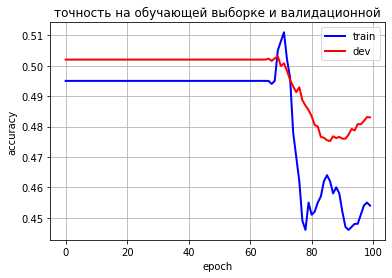

Итоговая точность на обучающей:		  0.454 % 

Итоговая точность на валидационной:		  0.483 % 



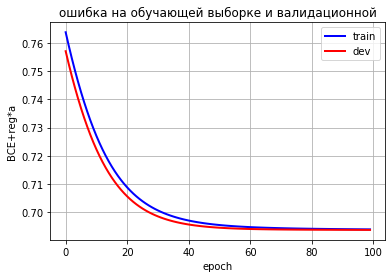

In [131]:
#Графика
plt.plot(graph_t[2], graph_t[1], lw = 2, color = 'blue',alpha = 1 ,label='train')
plt.plot(graph_v[2], graph_v[1], lw = 2, color = 'red', alpha = 1, label='dev')
plt.title('точность на обучающей выборке и валидационной')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(loc='best')
plt.show()

print("Итоговая точность на обучающей:\t\t ",graph_t[1][-1],"% \n")
print("Итоговая точность на валидационной:\t\t ",graph_v[1][-1],"% \n")


plt.plot(graph_t[2], graph_t[0], lw = 2, color = 'blue', alpha = 1 ,label='train')
plt.plot(graph_v[2], graph_v[0], lw = 2, color = 'red', alpha = 1, label='dev')
plt.title('ошибка на обучающей выборке и валидационной')
plt.ylabel('BCE+reg*a')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(loc='best')
plt.show()
#Конец графики